# Data Preprocessing

This notebook's purpose is to preprocess the cleaned data for the machine learning model.

## Table of Contents

1. [Importing Libraries](#import-libraries)
2. [Load Dataset](#load-dataset)
3. [Mapping Columns](#map-categorical-columns)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer 
import seaborn as sns
import sys
import os
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import joblib


# Import functions
notebook_dir = os.getcwd()
src_path = os.path.join(notebook_dir, '../src')
sys.path.append(src_path)
from data_cleaning import *

# Load Dataset

In [2]:
nhanes_df = pd.read_csv('../data/cleaned/nhanes_cleaned.csv')
nhanes_df

,SEQN,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,DMDMARTZ,DMDHHSIZ,INDFMPIR,LBDTCSI,DIQ010,...,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SMQ040
0,130378.0,43.0,6.0,2.0,5.0,1.0,4.0,5.000000,6.830000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,130379.0,66.0,3.0,1.0,5.0,1.0,2.0,5.000000,5.530000,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,130380.0,44.0,2.0,2.0,3.0,1.0,7.0,1.410000,4.840000,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,130386.0,34.0,1.0,1.0,4.0,1.0,3.0,1.330000,4.730000,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
4,130387.0,68.0,3.0,1.0,5.0,3.0,1.0,1.320000,5.250000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,142305.0,76.0,1.0,2.0,1.0,2.0,4.0,2.250000,4.650000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6333,142307.0,49.0,4.0,1.0,5.0,3.0,5.0,2.893249,5.300000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6334,142308.0,50.0,2.0,2.0,4.0,1.0,3.0,1.950000,4.835153,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6335,142309.0,40.0,2.0,1.0,4.0,2.0,5.0,3.110000,6.590000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Map categorical columns

In [3]:
nhanes_df = map_cat_vars(nhanes_df)
nhanes_df

,SEQN,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,DMDMARTZ,DMDHHSIZ,INDFMPIR,LBDTCSI,DIQ010,...,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SMQ040
0,130378.0,43.0,Non-Hispanic Asian,"Born in Other Countries, including U.S. territ...",College graduate or above,Married/Living with partner,4,5.000000,6.830000,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,Not at all
1,130379.0,66.0,Non-Hispanic White,"Born in 50 US States or Washington, DC",College graduate or above,Married/Living with partner,2,5.000000,5.530000,No,...,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,Not at all
2,130380.0,44.0,Other Hispanic,"Born in Other Countries, including U.S. territ...",High school graduate/GED or equivalent,Married/Living with partner,7 or more people,1.410000,4.840000,Yes,...,Not at all,Several days,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,NaN
3,130386.0,34.0,Mexican American,"Born in 50 US States or Washington, DC",Some college or AA degree,Married/Living with partner,3,1.330000,4.730000,No,...,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Not at all,Not at all,Not difficult at all,Not at all
4,130387.0,68.0,Non-Hispanic White,"Born in 50 US States or Washington, DC",College graduate or above,Never married,1,1.320000,5.250000,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,142305.0,76.0,Mexican American,"Born in Other Countries, including U.S. territ...",Less than 9th grade,Widowed/Divorced/Separated,4,2.250000,4.650000,Borderline,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,NaN
6333,142307.0,49.0,Non-Hispanic Black,"Born in 50 US States or Washington, DC",College graduate or above,Never married,5,2.893249,5.300000,Yes,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,Not at all
6334,142308.0,50.0,Other Hispanic,"Born in Other Countries, including U.S. territ...",Some college or AA degree,Married/Living with partner,3,1.950000,4.835153,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,NaN
6335,142309.0,40.0,Other Hispanic,"Born in 50 US States or Washington, DC",Some college or AA degree,Widowed/Divorced/Separated,5,3.110000,6.590000,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,NaN


# Feature Engineering

## Renaiming Columns

In [4]:
nhanes_df.rename(columns={'DMDEDUC2': 'Education'}, inplace=True)
nhanes_df.rename(columns={'DMDBORN4': 'Birthplace'}, inplace=True)
nhanes_df.rename(columns={'RIDRETH3': 'Ethnicity'}, inplace=True)
nhanes_df.rename(columns={'DMDMARTZ': 'Marital_Status'}, inplace=True)
nhanes_df.rename(columns={'DMDHHSIZ': 'Household_Size'}, inplace=True)
nhanes_df.rename(columns={'INDFMPIR': 'Income_poverty_ratio'}, inplace=True)
nhanes_df.rename(columns={'DMDYRUSR': 'Years_in_US'}, inplace=True)
nhanes_df.rename(columns={'LBXTC': 'Total_CHOL'}, inplace=True)
nhanes_df.rename(columns={'DIQ010': 'Diagnosed'}, inplace=True)
nhanes_df.rename(columns={'DID040': 'Age_Diagnosed'}, inplace=True)
nhanes_df.rename(columns={'DIQ160': 'Prediabetec'}, inplace=True)
nhanes_df.rename(columns={'DBQ930': 'M_Meal_Preparer'}, inplace=True)
nhanes_df.rename(columns={'DBQ940': 'M_Food_Shopper'}, inplace=True)
nhanes_df.rename(columns={'DBQ945': 'S_Food_Shopper'}, inplace=True)
nhanes_df.rename(columns={'BPQ020': 'HBP'}, inplace=True)
nhanes_df.rename(columns={'BPQ080': 'HCL'}, inplace=True)
nhanes_df.rename(columns={'BPQ101D': 'LBC_Medication'}, inplace=True)

nhanes_df.rename(columns={'BPQ150': 'HBP_Medication'}, inplace=True)
nhanes_df.rename(columns={'PAD680': 'Sedetary_position(m)'}, inplace=True)
nhanes_df.rename(columns={'PAD810U': 'Vigorous_LTPA_unit'}, inplace=True)
nhanes_df.rename(columns={'PAD790U': 'Moderate_LTPA_unit'}, inplace=True)
nhanes_df.rename(columns={'ALQ130': 'Avg_drinking'}, inplace=True)
nhanes_df.rename(columns={'ALQ142': '#days_4_drinks'}, inplace=True)
nhanes_df.rename(columns={'ALQ280': '#says_8+_drinks'}, inplace=True)
nhanes_df.rename(columns={'INDFMMPC ': 'Poveryt_Cat'}, inplace=True)
nhanes_df.rename(columns={'DPQ010': 'Interest'}, inplace=True)
nhanes_df.rename(columns={'DPQ020': 'Depressed/Hopeless'}, inplace=True)
nhanes_df.rename(columns={'DPQ030': 'Irregular_Sleep'}, inplace=True)
nhanes_df.rename(columns={'DPQ040': 'Tired'}, inplace=True)
nhanes_df.rename(columns={'DPQ050': 'Inconsistent Appetite'}, inplace=True)
nhanes_df.rename(columns={'DPQ060': 'Insecure'}, inplace=True)
nhanes_df.rename(columns={'DPQ070': 'Trouble_Concentrating'}, inplace=True)
nhanes_df.rename(columns={'DPQ080': 'Irregular_Movement'}, inplace=True)
nhanes_df.rename(columns={'DPQ090': 'Suicidal'}, inplace=True)
nhanes_df.rename(columns={'DPQ100': 'Current_Problems'}, inplace=True)
nhanes_df.rename(columns={'SMQ040': 'Smokes'}, inplace=True)

In [5]:
##Drop columns that were not matched 
nhanes_df = nhanes_df.drop(['SEQN', 'RIDAGEYR', 'LBDTCSI', 'INDFMMPC'], axis=1)

In [6]:
#Drop columns that will not be used
nhanes_df = nhanes_df.drop(['Age_Diagnosed', 'Income_poverty_ratio', 'M_Meal_Preparer', 'S_Food_Shopper', 'M_Food_Shopper',
                           'LBC_Medication', 'HBP_Medication', 'Sedetary_position(m)', 'Vigorous_LTPA_unit', 'Moderate_LTPA_unit',
                           '#days_4_drinks', '#says_8+_drinks', 'Interest'], axis=1)

In [7]:
##Create new CSV file
##nhanes_df.to_csv('Labeled_DF.csv', index=False)

In [8]:
nhanes_df['Prediabetec'] = nhanes_df['Prediabetec'].apply(lambda x: 1 if x == 'Yes' else 0)
nhanes_df['HBP'] = nhanes_df['HBP'].apply(lambda x: 1 if x == 'Yes' else 0)
nhanes_df['HCL'] = nhanes_df['HCL'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
def categorize(value):
    if value == "Not at all":  # Conditions for category 1
        return 0
    elif value == "Several days":  # Conditions for category 2
        return 1
    elif value == "More than half the days":  # Conditions for category 3
        return 2
    elif value in "Nearly every day":  # Conditions for category 4
        return 3
    else:
        return None

In [10]:
def smoke_categorizaiton(value):
    if value == None:
        return -1
    if value == "Not at all":
        return 0
    else:
        return 1

In [11]:
nhanes_df["Depressed/Hopeless_CAT"] = nhanes_df["Depressed/Hopeless"].apply(categorize)
nhanes_df["Irregular_Sleep_CAT"] = nhanes_df["Irregular_Sleep"].apply(categorize)
nhanes_df["Tired_CAT"] = nhanes_df["Tired"].apply(categorize)
nhanes_df["Inconsistent_Appetite_CAT"] = nhanes_df["Inconsistent Appetite"].apply(categorize)
nhanes_df["Insecure_CAT"] = nhanes_df["Insecure"].apply(categorize)
nhanes_df["Trouble_Concentrating_CAT"] = nhanes_df["Trouble_Concentrating"].apply(categorize)
nhanes_df["Irregular_Movement_CAT"] = nhanes_df["Irregular_Movement"].apply(categorize)
nhanes_df["Suicidal_CAT"] = nhanes_df["Suicidal"].apply(categorize)

In [12]:
nhanes_df["Smokes_CAT"] = nhanes_df["Smokes"].apply(smoke_categorizaiton)

In [13]:
def ethnicity_convert(str):
    if str.find("Non-Hispanic") != -1:
        return 0
    else:
        return 1

In [14]:
nhanes_df["Ethnicity"] = nhanes_df["Ethnicity"].apply(ethnicity_convert)

In [15]:
nhanes_df = nhanes_df.drop(['Marital_Status', 'Education', 'Birthplace', 'Depressed/Hopeless', 'Irregular_Sleep', 'Tired',
                           'Inconsistent Appetite', 'Trouble_Concentrating', 'Irregular_Movement', 'Suicidal', 'Smokes', 'Insecure',
                           'Current_Problems', 'Household_Size'], axis = 1)

In [16]:
nhanes_df = nhanes_df[nhanes_df['Diagnosed'] != 'Borderline']

In [17]:
nhanes_df['Diagnosed'] = nhanes_df['Diagnosed'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
nhanes_df.head()

,Ethnicity,Diagnosed,Prediabetec,HBP,HCL,Avg_drinking,Depressed/Hopeless_CAT,Irregular_Sleep_CAT,Tired_CAT,Inconsistent_Appetite_CAT,Insecure_CAT,Trouble_Concentrating_CAT,Irregular_Movement_CAT,Suicidal_CAT,Smokes_CAT
0,0,0,0,1,0,2.0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,3.0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,1,1.0,0,1,1,0,0,0,0,0,1
3,1,0,0,0,0,2.0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,2.0,0,0,0,0,0,0,0,0,1


In [19]:
Y = nhanes_df['Diagnosed'].values

In [20]:
X = nhanes_df.drop(labels = ['Diagnosed'], axis = 1)
X

,Ethnicity,Prediabetec,HBP,HCL,Avg_drinking,Depressed/Hopeless_CAT,Irregular_Sleep_CAT,Tired_CAT,Inconsistent_Appetite_CAT,Insecure_CAT,Trouble_Concentrating_CAT,Irregular_Movement_CAT,Suicidal_CAT,Smokes_CAT
0,0,0,1,0,2.0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,3.0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,1.0,0,1,1,0,0,0,0,0,1
3,1,0,0,0,2.0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,2.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,1,0,0,0,2.0,0,0,0,0,0,0,0,0,0
6333,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0
6334,1,0,0,0,2.0,0,0,0,0,0,0,0,0,1
6335,1,0,0,0,2.0,0,0,0,0,0,0,0,0,1


# Split the data

In [21]:
#Values are just to start off with, can be adjusted later
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 20)

# Training Model

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')

In [23]:
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=30)

In [24]:
prediction_test = model.predict(X_test)

In [ ]:
#Print out the accuracy of the model
print("Accuracy = ", metrics.accuracy_score(Y_test, prediction_test))
print("Precision = ", metrics.precision_score(Y_test, prediction_test))
print("Recall = ", metrics.recall_score(Y_test, prediction_test))
print("F1-Score = ", metrics.f1_score(Y_test, prediction_test))

Accuracy =  0.8008994276369583
Precision =  0.36674259681093396
Recall =  0.43513513513513513
F1-Score =  0.3980222496909765


# Saving the model

In [26]:
import joblib
joblib.dump(model, '../models/nhanes_model.pkl')

['../models/nhanes_model.pkl']

### Getting important features

In [27]:
feature_list = list(X.columns)

In [28]:
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values(ascending = False)

In [29]:
feature_imp

HBP                          0.172934
HCL                          0.166548
Avg_drinking                 0.111439
Prediabetec                  0.101021
Irregular_Sleep_CAT          0.077636
Tired_CAT                    0.069532
Inconsistent_Appetite_CAT    0.056008
Depressed/Hopeless_CAT       0.049341
Trouble_Concentrating_CAT    0.046640
Smokes_CAT                   0.041035
Insecure_CAT                 0.037783
Ethnicity                    0.029068
Irregular_Movement_CAT       0.027836
Suicidal_CAT                 0.013178
dtype: float64

# Visualizations

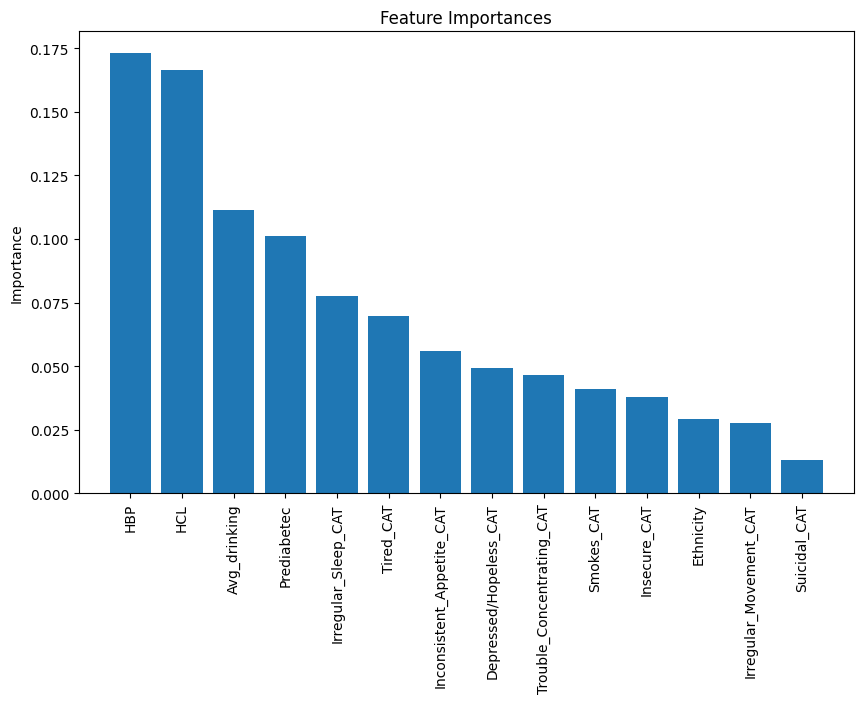

In [30]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.show()